In [1]:
import pandas as pd

# Read the data 

file_path = 'Dataset/DSD_PTD_RY25_P04_V10_DY23_BGM.csv'

csvFile = pd.read_csv(file_path)

csvFile.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Tot_Benes_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,...,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Tot_Benes_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Avg_Spnd_Per_Bene_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
4,Abacavir,Abacavir Sulfate,5,Overall,10110328.45,3316293.0,42629.0,6085.0,3.482725,237.170200,...,5287295.41,1648593.0,19632,2809.0,3.594357,269.320263,1882.269637,0.0,-0.071481,0.007919


In [2]:
# Explore the columns of this dataset

csvFile.columns

Index(['Brnd_Name', 'Gnrc_Name', 'Tot_Mftr', 'Mftr_Name', 'Tot_Spndng_2019',
       'Tot_Dsg_Unts_2019', 'Tot_Clms_2019', 'Tot_Benes_2019',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Clm_2019',
       'Avg_Spnd_Per_Bene_2019', 'Outlier_Flag_2019', 'Tot_Spndng_2020',
       'Tot_Dsg_Unts_2020', 'Tot_Clms_2020', 'Tot_Benes_2020',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Clm_2020',
       'Avg_Spnd_Per_Bene_2020', 'Outlier_Flag_2020', 'Tot_Spndng_2021',
       'Tot_Dsg_Unts_2021', 'Tot_Clms_2021', 'Tot_Benes_2021',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Clm_2021',
       'Avg_Spnd_Per_Bene_2021', 'Outlier_Flag_2021', 'Tot_Spndng_2022',
       'Tot_Dsg_Unts_2022', 'Tot_Clms_2022', 'Tot_Benes_2022',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022', 'Avg_Spnd_Per_Clm_2022',
       'Avg_Spnd_Per_Bene_2022', 'Outlier_Flag_2022', 'Tot_Spndng_2023',
       'Tot_Dsg_Unts_2023', 'Tot_Clms_2023', 'Tot_Benes_2023',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2023', 'Avg_S

KPIs to calculate:
- price per dose unit (weighted) by year
- spend per claim by year
- YoY change and 2019-2023 CAGR in price per dose unit
- manufacturer share of total spend
- brand vs generic share and substitution ratio
- outlier count and contribution to spend

In [ ]:
# Price per dose unit (weighted) by year

years = [2019, 2020, 2021, 2022, 2023]
results = {}

for year in years:
   kpi= round(csvFile[f'Tot_Spndng_{year}'].sum()/csvFile[f'Tot_Dsg_Unts_{year}'].sum(), 2)
   results[year] = kpi

results


{2019: np.float64(1.69),
 2020: np.float64(1.75),
 2021: np.float64(1.88),
 2022: np.float64(2.01),
 2023: np.float64(2.21)}

In [18]:
tlts = sum(csvFile['Tot_Clms_2019'])
tlts

nan

In [26]:
csvFile['Tot_Clms_2019'].sum()

np.float64(2875940518.0)

In [32]:
results_claim = {}
for year in years:
    total_spending = csvFile[f'Tot_Spndng_{year}'].sum()
    total_claims = csvFile[f'Tot_Clms_{year}'].sum()
    spend_per_claim = round(total_spending / total_claims, 2)
    results_claim[year] = spend_per_claim

results_claim

{2019: np.float64(124.44),
 2020: np.float64(133.15),
 2021: np.float64(143.58),
 2022: np.float64(155.66),
 2023: np.float64(170.57)}

/var/folders/wy/v92nv28111j7vk4ynsyxm2700000gn/T/ipykernel_3323/306519548.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/wy/v92nv28111j7vk4ynsyxm2700000gn/T/ipykernel_3323/306519548.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


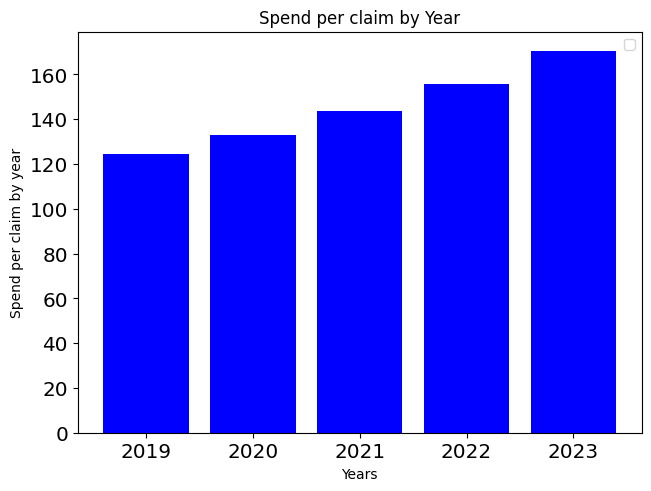

In [31]:
import matplotlib.pyplot as plt

# Display the results in a bar chart

years = list(results_claim.keys())
results_claim_values = list(results_claim.values())

fig, ax = plt.subplots(constrained_layout=True)
ax.tick_params(labelsize='x-large')

ax.bar(years, results_claim_values, color='blue')

ax.set_xlabel('Years')
ax.set_ylabel('Spend per claim by year')
ax.set_title('Spend per claim by Year')

ax.legend()
fig.show()

In [37]:
import pandas as pd

# Define price ranges
bins = [0, 25, 50, 100, 200, 500, 1000, 5000, float('inf')]
labels = ['$0-25', '$25-50', '$50-100', '$100-200', '$200-500', '$500-1K', '$1K-5K', '$5K+']

freq_data = []

for year in years:
    spend_per_claim = csvFile[f'Avg_Spnd_Per_Clm_{year}'].dropna()
    spend_per_claim = spend_per_claim[spend_per_claim > 0]
    
    # Count drugs in each bin
    counts = pd.cut(spend_per_claim, bins=bins, labels=labels, right=False).value_counts().sort_index()
    
    row = {'Year': year}
    for label in labels:
        row[label] = counts.get(label, 0)
    
    freq_data.append(row)

freq_df = pd.DataFrame(freq_data)
print(freq_df.to_string(index=False))

 Year  $0-25  $25-50  $50-100  $100-200  $200-500  $500-1K  $1K-5K  $5K+
 2019   2228    1447     1321      1175      1395      939     914   685
 2020   2291    1565     1487      1289      1460     1083    1069   807
 2021   2462    1723     1589      1417      1521     1199    1227   893
 2022   2600    1855     1701      1466      1748     1201    1405  1007
 2023   2881    2110     1843      1538      1906     1286    1575  1170


The number of drugs in the 0-100 range increased by approximately 1,800 drugs (37% growth) from 2019 to 2023. However, the number of ultra-expensive drugs (5K+ per claim) increased by 71% - nearly doubling from 685 to 1,170 drugs.

In [75]:
# Count of unique drugs, manufactures

print(f"There are {csvFile['Brnd_Name'].nunique()} of unique drugs in the dataset.")
csvFile['Brnd_Name'].unique().tolist()[:10]

There are 3474 of unique drugs in the dataset.


['1st Tier Unifine Pentips',
 '1st Tier Unifine Pentips Plus',
 'Abacavir',
 'Abacavir-Lamivudine',
 'Abilify',
 'Abilify Asimtufii',
 'Abilify Maintena',
 'Abilify Mycite',
 'Abiraterone Acetate',
 'Abraxane']

In [ ]:
print(f"There are {csvFile['Mftr_Name'].nunique()} unique names of manufacturers.")

csvFile['Mftr_Name'].unique().tolist()


There are 962 unique names of manufacturers.


['Overall',
 'Owen Mumford Us',
 'Cipla USA, Inc.',
 'Rising Pharm',
 'Mylan',
 'Aurobindo Pharm',
 'Camber Pharmace',
 'Lupin Pharmaceu',
 'Laurus Labs Lim',
 'Otsuka America',
 'AHP',
 'Civicascript, L',
 'West-Ward/Hikma',
 'Bluepoint/Oncop',
 'Major Pharmaceu',
 'Florida Pharmac',
 'Northstar Rx Ll',
 'Avkare',
 'Novugen Pharma',
 'Novadoz Pharmac',
 'Amneal Pharmace',
 "Dr.Reddy'S Lab",
 'Celltrion USA,',
 'Glenmark Pharma',
 'Apotex Corp',
 'Wockhardt USA L',
 'Teva USA',
 'BMS-Abraxis Bio',
 'Pfizer US Pharm',
 'Sun Pharmaceuti',
 'Marlex Pharm.',
 'Zydus Pharmaceu',
 'Bausch Health U',
 'Virtus Pharmace',
 'Roxane/West-War',
 'Avet Pharmaceut',
 'Chartwell Rx Ll',
 'Strides Pharma',
 'Par Pharmaceuti',
 'Jg Pharma, Inc.',
 'Ani Pharmaceuti',
 'Xspire Pharma',
 'Leucadia/Hikma',
 'Auromedics-Eugi',
 'Fresenius Kabi',
 'B.Braun',
 'Sandoz',
 'Hikma Pharmaceu',
 'Hi-Tech/Akorn C',
 'Eywa Pharma Inc',
 'Genus Lifescien',
 'Ranbaxy Pharmac',
 'Pharm Assoc Inc',
 'Mallinckrodt Ph',
 

/var/folders/wy/v92nv28111j7vk4ynsyxm2700000gn/T/ipykernel_891/3123641603.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/wy/v92nv28111j7vk4ynsyxm2700000gn/T/ipykernel_891/3123641603.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


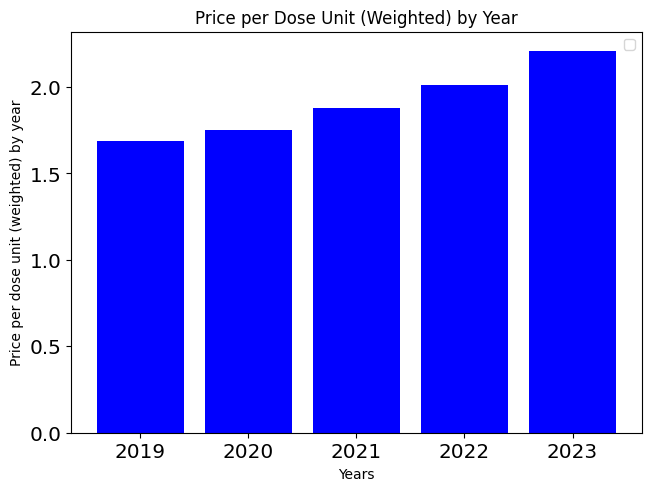

In [5]:
import matplotlib.pyplot as plt

# Display the results in a bar chart

years = list(results.keys())
kpi_values = list(results.values())

fig, ax = plt.subplots(constrained_layout=True)
ax.tick_params(labelsize='x-large')

ax.bar(years, kpi_values, color='blue')

ax.set_xlabel('Years')
ax.set_ylabel('Price per dose unit (weighted) by year')
ax.set_title('Price per Dose Unit (Weighted) by Year')

ax.legend()
fig.show()

As we can see based on the bar chart, the price per unit has been increasing since 2019. 

Next, we will calculate the YoY change.

In [ ]:
# Calculate the difference between consecutive years

# Calculate the average increase per year
value_list = list(results.values())

for i in range(1, len(value_list)):
    result = round((value_list[i] - value_list[i-1])/ value_list[i-1] * 100, 2)
    print(result)

3.55
7.43
6.91
9.95


As KPI is increasing each year, the YoY changes reflect that.

Next, we will calculate CAGR (Compound Annual Growth Rate)

In [ ]:
CAGR = (value_list[-1]/value_list[0])**(1/4)-1
CAGR 

np.float64(0.06936605042133781)

Drug costs are growing consistently year-over-year, with a CAGR of 6.94% from 2019–2023. This sustained increase may be driven by factors such as inflation, manufacturing cost pressures, or shifts in drug mix (brand vs. generic).

In [69]:
import pandas as pd

top20_by_year = {}

for year in years:
    # Group by drug name and sum spending for that year
    drug_spending = csvFile.groupby('Brnd_Name')[f'Tot_Spndng_{year}'].sum()
    
    # Get top 20
    top20 = drug_spending.nlargest(20)
    
    # Convert to billions for readability
    top20_billions = (top20 / 1e9).round(2)
    
    top20_by_year[year] = top20_billions

# Display results
for year in years:
    print(f"\n=== Top 20 Drugs by Spending in {year} ($ Billions) ===")
    print(top20_by_year[year])


=== Top 20 Drugs by Spending in 2019 ($ Billions) ===
Brnd_Name
Eliquis              14.61
Revlimid              9.35
Xarelto               8.15
Januvia               7.07
Lantus Solostar       4.99
Imbruvica             4.88
Trulicity             4.55
Lyrica                4.05
Symbicort             4.03
Novolog Flexpen       3.69
Ibrance               3.65
Humira Pen            3.50
Levemir Flextouch     3.24
Victoza 3-Pak         3.05
Advair Diskus         2.90
Jardiance             2.90
Myrbetriq             2.89
Xtandi                2.84
Restasis              2.71
Breo Ellipta          2.68
Name: Tot_Spndng_2019, dtype: float64

=== Top 20 Drugs by Spending in 2020 ($ Billions) ===
Brnd_Name
Eliquis              19.87
Revlimid             10.71
Xarelto               9.40
Januvia               7.73
Trulicity             6.57
Imbruvica             5.93
Lantus Solostar       5.33
Jardiance             4.75
Humira(Cf) Pen        4.34
Ibrance               4.22
Symbicort             

The same drugs dominate spending year-over-year. These top 20 drugs accounted for 91B in 2019 and 214B in 2023, representing a 135% increase.

Notably, Eliquis spending increased 150%, rising from 14.6B in 2019 to 36.5B in 2023.

The top 3 drugs in 2023—Eliquis, Ozempic, and Jardiance—represent 72.6B in spending alone.

Several new drugs entered the top 20 by 2023 that weren't present in 2019, such as Farxiga and Trelegy Ellipta.

Conversely, Lyrica dropped out of the top 20 after ranking 8th in 2019 (4.05B), likely due to patent expiration and generic competition.
Revlimid fell from 2nd to 10th place between 2019 and 2023.

There is growing demand for diabetes drugs: in 2019, there were 4-5 diabetes medications in the top 20, but by 2023, this increased to 8 drugs.

Meanwhile, cancer drugs are declining in rank.

In [8]:
# KPI: manufacturer share of total spend

# Group spending by manufacturer for each year, then sum total spending across all manufacturers per year.

In [9]:
mftr_spending_detail = {}

for year in years:
   spending = round(csvFile.groupby('Mftr_Name')[f'Tot_Spndng_{year}'].sum(), 2)
   mftr_spending_detail[year] = spending


mftr_spending_total = {}
for year in years:
   result = mftr_spending_detail[year].sum()
   mftr_spending_total[year] = result

mftr_spending_total

{2019: np.float64(357882769075.67004),
 2020: np.float64(392708609310.14),
 2021: np.float64(429548317774.91003),
 2022: np.float64(480625017491.22003),
 2023: np.float64(551849041101.75)}

In [10]:
mftr_share_by_year = {}
for year in years:
    mftr_shares = round(mftr_spending_detail[year]/ mftr_spending_total[year] * 100, 4)
    mftr_share_by_year[year] = mftr_shares

mftr_share_by_year

{2019: Mftr_Name
 3M Espe Dental      0.0000
 AHP                 0.0008
 AHP*                0.0000
 Abbott Diabetes     0.0000
 Abbvie US LLC       1.6588
                      ...  
 Zealand Ph/Novo     0.0000
 Zogenix/UCB Pha     0.0000
 Zydus Pharmaceu     0.3648
 Zydus Pharmaceu*    0.0386
 Zylera              0.0001
 Name: Tot_Spndng_2019, Length: 962, dtype: float64,
 2020: Mftr_Name
 3M Espe Dental      0.0000
 AHP                 0.0004
 AHP*                0.0000
 Abbott Diabetes     0.0000
 Abbvie US LLC       1.6992
                      ...  
 Zealand Ph/Novo     0.0000
 Zogenix/UCB Pha     0.0001
 Zydus Pharmaceu     0.3613
 Zydus Pharmaceu*    0.0447
 Zylera              0.0001
 Name: Tot_Spndng_2020, Length: 962, dtype: float64,
 2021: Mftr_Name
 3M Espe Dental      0.0000
 AHP                 0.0002
 AHP*                0.0000
 Abbott Diabetes     0.0000
 Abbvie US LLC       1.8135
                      ...  
 Zealand Ph/Novo     0.0000
 Zogenix/UCB Pha     0.0004
 Zy

In [11]:
mftr_share_by_year[2023].idxmax()

'Overall'

In [12]:
mftr_share_by_year = {}

for year in years:
    mftr_shares = round(mftr_spending_detail[year]/ mftr_spending_total[year] * 100, 4)
    mftr_share_by_year[year] = mftr_shares

    filtered_max_dict = {k: v for k, v in mftr_share_by_year[year].items() if 
                     k != 'Overall'}
    # print(f'{year}')

    for i in range(1, 6):
        max_mftr = max(filtered_max_dict, key=filtered_max_dict.get)
        max_share = filtered_max_dict[max_mftr]
        print(f'{year} Manufacturer: {max_mftr}, Share: {max_share}.')
        del filtered_max_dict[max_mftr]
   

2019 Manufacturer: Novo Nordisk, Share: 2.6412.
2019 Manufacturer: BMS Primarycare, Share: 2.2687.
2019 Manufacturer: Glaxosmithkline, Share: 2.1485.
2019 Manufacturer: Eli Lilly & Co., Share: 2.0531.
2019 Manufacturer: Janssen Pharm., Share: 2.0235.
2020 Manufacturer: BMS Primarycare, Share: 2.7631.
2020 Manufacturer: Novo Nordisk, Share: 2.649.
2020 Manufacturer: Boehringer Ing., Share: 2.2232.
2020 Manufacturer: Eli Lilly & Co., Share: 2.1425.
2020 Manufacturer: Glaxosmithkline, Share: 2.129.
2021 Manufacturer: BMS Primarycare, Share: 3.1599.
2021 Manufacturer: Novo Nordisk, Share: 2.7357.
2021 Manufacturer: Boehringer Ing., Share: 2.4529.
2021 Manufacturer: Eli Lilly & Co., Share: 2.3325.
2021 Manufacturer: Glaxosmithkline, Share: 2.0392.
2022 Manufacturer: BMS Primarycare, Share: 3.4088.
2022 Manufacturer: Novo Nordisk, Share: 2.9143.
2022 Manufacturer: Boehringer Ing., Share: 2.6875.
2022 Manufacturer: Eli Lilly & Co., Share: 2.4717.
2022 Manufacturer: Astrazeneca, Share: 2.0515.

Novo Nordisk shows consistent year-over-year growth in market share, increasing from 2.64% in 2020 to 3.43% in 2023. BMS Primarycare dominates the market, maintaining the #1 position from 2020 onwards with shares ranging from 2.76% to 3.55%.

In [13]:
filtered_2019 = {k: v for k, v in mftr_share_by_year[2019].items() if 
                 k != 'Overall'}

for i in range(1,6):
    max_mftr_2019 = max(filtered_2019, key=filtered_2019.get)
    max_share_2019 = filtered_2019[max_mftr_2019]

    print(f'2019: Manufacturer: {max_mftr_2019}, Share: {max_share_2019}')

    del filtered_2019[max_mftr_2019]

2019: Manufacturer: Novo Nordisk, Share: 2.6412
2019: Manufacturer: BMS Primarycare, Share: 2.2687
2019: Manufacturer: Glaxosmithkline, Share: 2.1485
2019: Manufacturer: Eli Lilly & Co., Share: 2.0531
2019: Manufacturer: Janssen Pharm., Share: 2.0235


In [23]:

# 'Brnd_Name', 'Gnrc_Name', 

csvFile['Brnd_Name'].unique()

csvFile['Brnd_Name'].isnull().any()

np.False_

In [24]:
csvFile['Brnd_Name'].nunique()

3474

In [20]:
csvFile['Gnrc_Name'].nunique()

1938

In [22]:
len(csvFile['Gnrc_Name'])

csvFile['Gnrc_Name'].isnull().any()

np.False_

In [37]:
csvFile['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019'].describe()

count    10104.000000
mean       176.391369
std       1494.579906
min          0.000232
25%          0.462640
50%          1.973185
75%         11.992071
max      40190.064683
Name: Avg_Spnd_Per_Dsg_Unt_Wghtd_2019, dtype: float64

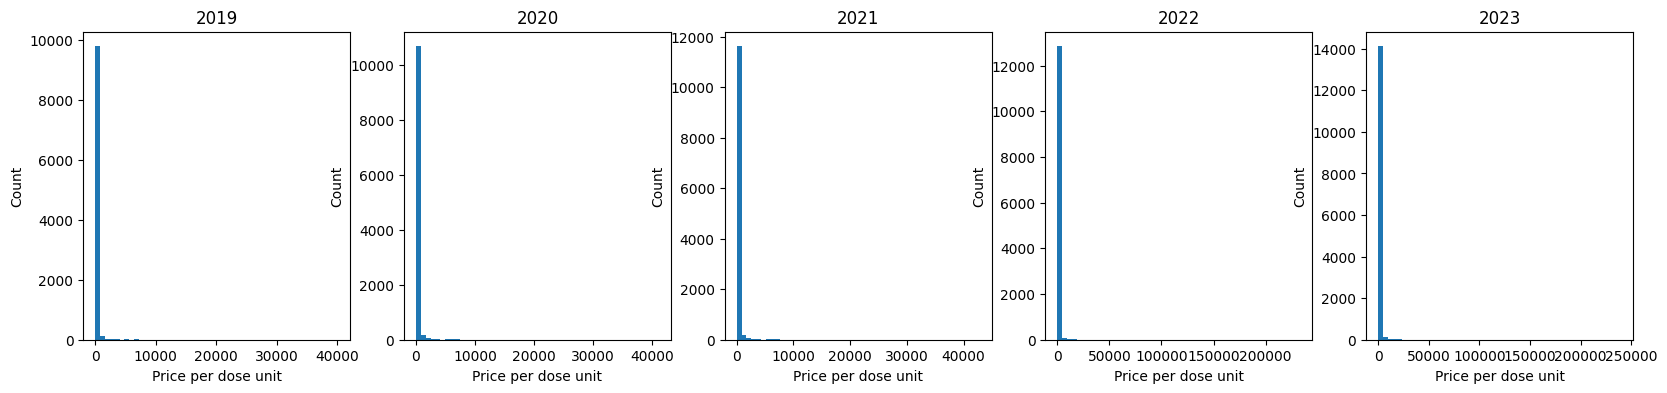

In [46]:

fig, axes = plt.subplots(1, 5, figsize=(20,4))


for i, year in enumerate(years):
    axes[i].hist(csvFile[f'Avg_Spnd_Per_Dsg_Unt_Wghtd_{year}'], bins=50)
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Price per dose unit')
    axes[i].set_ylabel('Count')

plt.show()

In [52]:
csvFile['drug_type'] = csvFile.apply(
    lambda row: 'Generic' if row['Brnd_Name'].lower() == row['Gnrc_Name'].lower()
    else 'Brand', axis=1)

print(csvFile['drug_type'].value_counts())

drug_type
Brand      9485
Generic    4824
Name: count, dtype: int64


Drugs are classified as generic if the brand name matches the generic name; otherwise, they're classified as brand drugs.

In [53]:
for year in years:
    brand_spending = csvFile[csvFile['drug_type'] == 'Brand'][f'Tot_Spndng_{year}'].sum()
    generic_spending = csvFile[csvFile['drug_type'] == 'Generic'][f'Tot_Spndng_{year}'].sum()

    total_spending = brand_spending + generic_spending

    brand_share = (brand_spending/ total_spending) * 100
    generic_share = (generic_spending/ total_spending) * 100

    print(f'{year}: Brand {brand_share:.2f}%, Generic: {generic_share:.2f}%')

2019: Brand 88.30%, Generic: 11.70%
2020: Brand 88.97%, Generic: 11.03%
2021: Brand 89.73%, Generic: 10.27%
2022: Brand 90.04%, Generic: 9.96%
2023: Brand 90.64%, Generic: 9.36%
